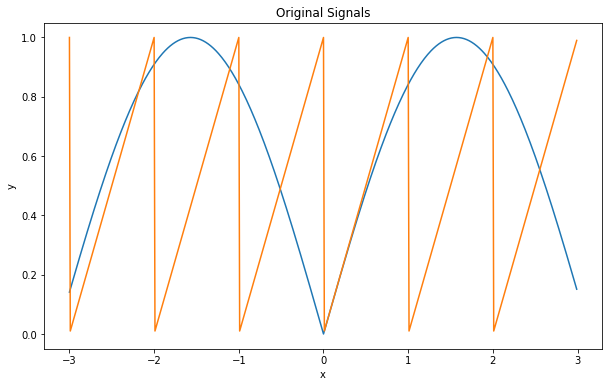

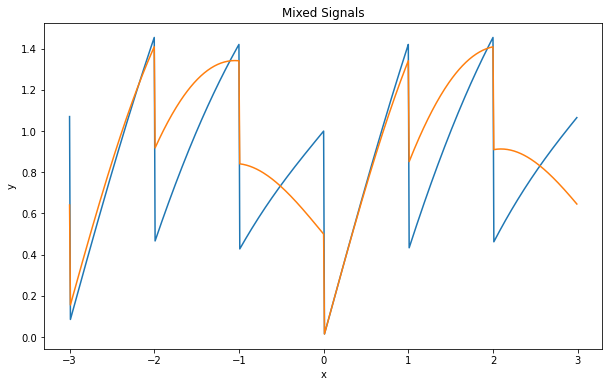

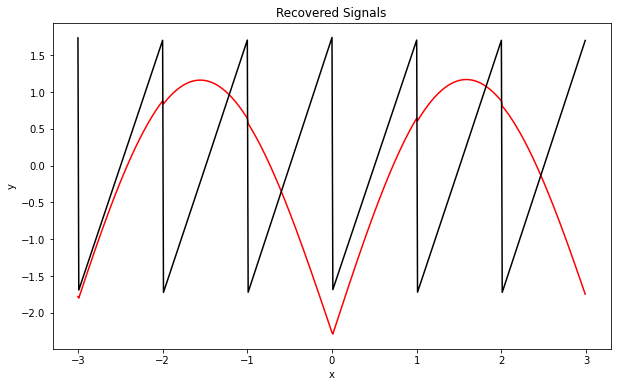

In [1]:
import numpy as np
import random;
from matplotlib import pyplot as plt
import random;

# Plotting sinosudal and ramp wave
inp = np.arange(-3,3, 0.01)
# print(inp)
oup = []
oup2 = []
for i in inp:
  oup.append(abs(np.sin(i)))
  if i < 0:
    oup2.append(1 - abs(-abs(i) + int(abs(i))))
  else:
    oup2.append(abs(-abs(i) + int(abs(i))))



Signals =  np.array([oup, oup2])


plt.figure(figsize = (10,6))
plt.plot(inp, Signals[0])
plt.plot(inp, Signals[1])
plt.title("Original Signals")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# MixingSignals
Signals = Signals.transpose()
MixingMatrix = np.array([[0.5, 1],[1, 0.5]])
MixedSignals = np.dot(Signals, MixingMatrix.T)
MixedSignals = MixedSignals.T


plt.figure(figsize = (10,6))
plt.plot(inp, MixedSignals[0])
plt.plot(inp, MixedSignals[1])
plt.title("Mixed Signals")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

class ICA:
  def __init__(self, data):
    self.dataSet = data
    self.standardizedData = []
    self.cMatrix = []
    self.whitenedData = []
  def standarization(self):
    self.standardizedData = self.dataSet - np.mean(self.dataSet, axis = 1, keepdims = True)
  def whitening(self):
    self.cMatrix = np.cov(self.standardizedData)
    m1, m2, m3 = np.linalg.svd(self.cMatrix)
    diagonal = np.diag(1.0 / np.sqrt(m2))
    whitenedMatrix = np.dot(m1, np.dot(diagonal, m1.T))

    self.whitenedData = np.dot(whitenedMatrix, self.standardizedData)
  def preProcessing(self):
    self.standarization()
    self.whitening()
  def algorithim(self):
    self.preProcessing()
    rows, col = self.whitenedData.shape
    wMatrix = np.random.rand(rows, rows)
    for i1 in range(rows):
      Wi = wMatrix[i1, :]
      for i2 in range(1000):
        Exp1 = (self.whitenedData*np.tanh(np.dot(Wi.T, self.whitenedData))).mean(axis=1)
        Exp2 = 1 - np.dot(Wi.T, self.whitenedData)*np.dot(Wi.T, self.whitenedData)
        Exp3 = Exp2.mean()*Wi
        Wni = Exp1 - Exp3
        Wni = Wni/np.sqrt((Wni**2).sum())
        Wni = Wni - np.dot(np.dot(Wni, wMatrix[:i1].T), wMatrix[:i1])
        Wi = Wni
        if np.abs(np.abs((Wi*Wni).sum()) - 1) < 10*(-9):
          break
      wMatrix[i1, :] = Wi
    return np.dot(wMatrix, self.whitenedData)


test = ICA(MixedSignals)
# test.preProcessing()
unmixingMatrix = test.algorithim()


plt.figure(figsize = (10,6))
plt.plot(inp, unmixingMatrix[0], color = "red" )
plt.plot(inp, unmixingMatrix[1], color = "black")
plt.title("Recovered Signals")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# print(test.algorithm())



